# Importing Libraries

In [1]:
# importing imp lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

#Miscellaneous
import warnings
warnings.filterwarnings('ignore')

# Data Reading and Cleaning

In [2]:
data=pd.read_csv("abe.us.txt")
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766,0
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343,0
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643,0
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101,0
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3190 non-null   object 
 1   Open     3190 non-null   float64
 2   High     3190 non-null   float64
 3   Low      3190 non-null   float64
 4   Close    3190 non-null   float64
 5   Volume   3190 non-null   int64  
 6   OpenInt  3190 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 174.6+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.0
mean,11.599416,11.712848,11.484610,11.605599,28444.870846,0.0
std,2.350376,2.365621,2.327065,2.341989,37525.175821,0.0
min,5.860300,5.905000,5.834700,5.841100,106.000000,0.0
25%,10.534000,10.655000,10.413750,10.554000,8147.750000,0.0
50%,11.981000,12.067000,11.899000,11.988500,17741.500000,0.0
75%,13.271000,13.386750,13.189000,13.295750,36167.250000,0.0
max,18.130000,19.151000,17.842000,17.925000,634041.000000,0.0


In [5]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [6]:
data.drop('OpenInt', inplace=True, axis=1)
data.head()

,Date,Open,High,Low,Close,Volume
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387


# Data Preprocessing and Analysis

In [7]:
#Filling null columns with mean values
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387


In [8]:
#Analyze the closing prices from dataframe
data["Date"]=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=data['Date']

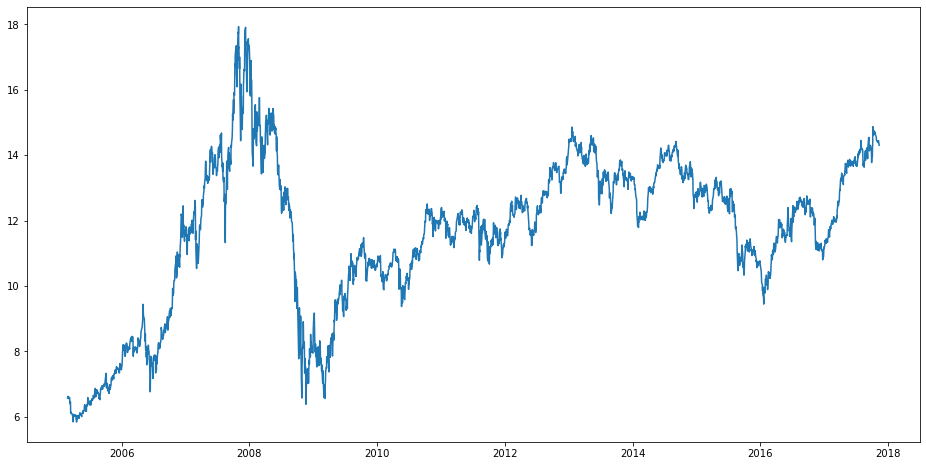

In [9]:
plt.figure(figsize=(16,8))
plt.plot(data["Close"],label='Close Price history')

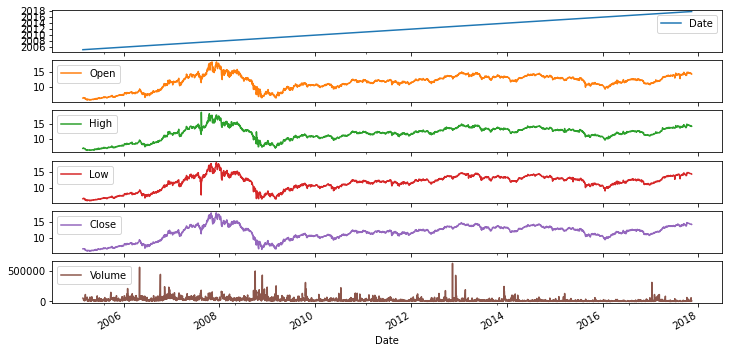

In [10]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()
    
data['Daily Return'] = data['Close'].pct_change()

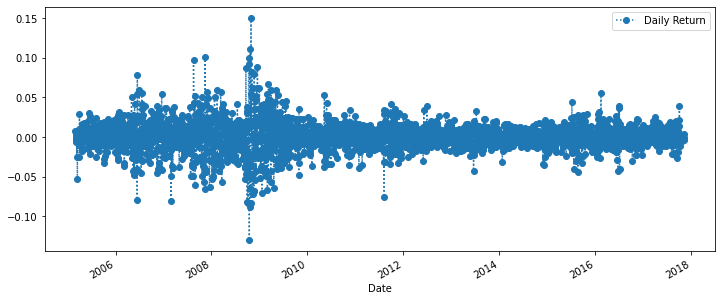

In [11]:
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

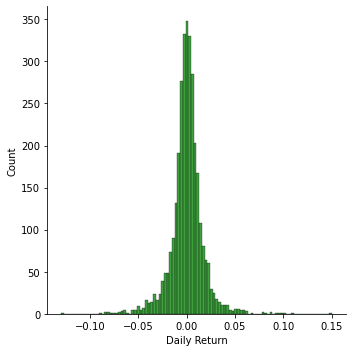

In [12]:
sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [13]:
date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

,Date,data_close
Date,,
2005-02-25,2005-02-25,6.5753
2005-02-28,2005-02-28,6.6263
2005-03-01,2005-03-01,6.6072
2005-03-02,2005-03-02,6.5816
2005-03-03,2005-03-03,6.5944


In [14]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
0,2005-02-25,6.4987,6.6009,6.4668,6.5753,55766,11.60878,11.625272,11.649354,0.000388
1,2005-02-28,6.6072,6.7669,6.5944,6.6263,49343,11.60878,11.625272,11.649354,0.007756
2,2005-03-01,6.6391,6.6773,6.6072,6.6072,31643,11.60878,11.625272,11.649354,-0.002882
3,2005-03-02,6.5753,6.6072,6.5434,6.5816,27101,11.60878,11.625272,11.649354,-0.003875
4,2005-03-03,6.5753,6.6135,6.5562,6.5944,17387,11.60878,11.625272,11.649354,0.001945


In [15]:
data.nunique()

Date               3190
Open               1784
High               1843
Low                1789
Close              1864
Volume             2728
MA for 10 days     3115
MA for 50 days     3124
MA for 100 days    3090
Daily Return       3070
dtype: int64

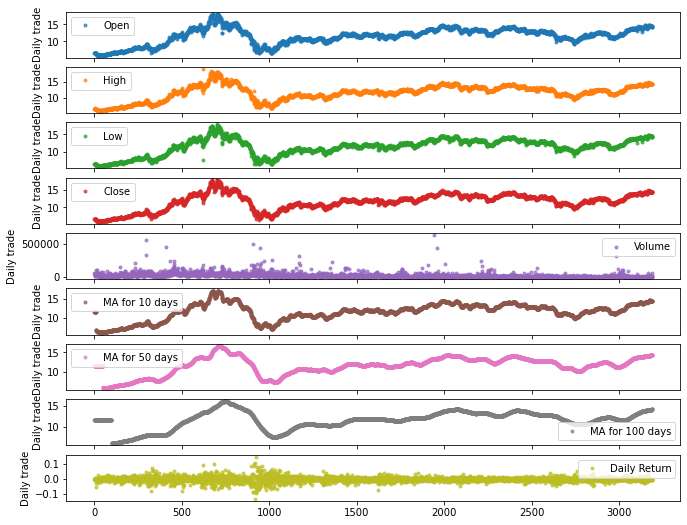

In [16]:
data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

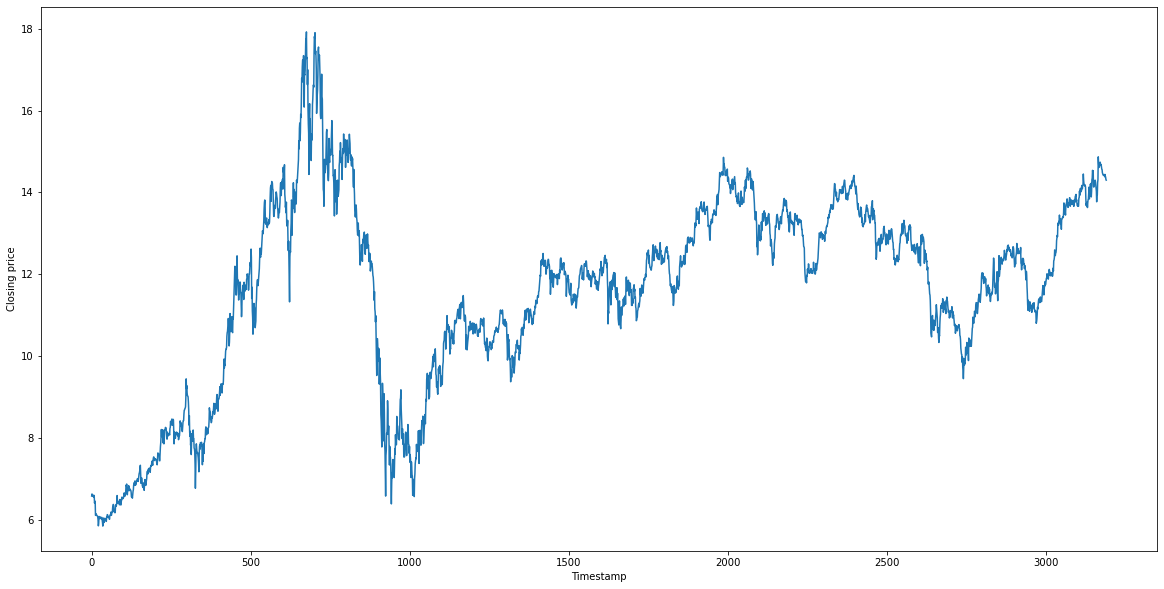

In [17]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
df

data.isnull().sum()

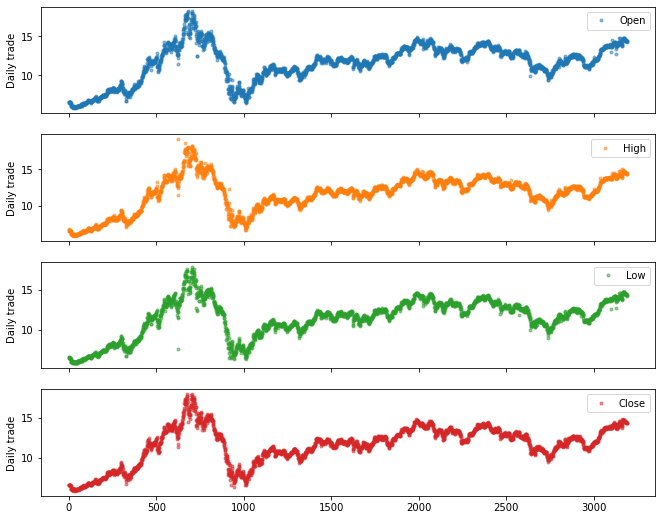

In [18]:
#After that, we'll visualize the data for understanding, this is shown below
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

,count,mean,std,min,25%,50%,75%,max
Open,3190.0,11.599416,2.350376,5.860300,10.534000,11.981000,13.271000,18.130000
High,3190.0,11.712848,2.365621,5.905000,10.655000,12.067000,13.386750,19.151000
Low,3190.0,11.484610,2.327065,5.834700,10.413750,11.899000,13.189000,17.842000
Close,3190.0,11.605599,2.341989,5.841100,10.554000,11.988500,13.295750,17.925000
Volume,3190.0,28444.870846,37525.175821,106.000000,8147.750000,17741.500000,36167.250000,634041.000000
MA for 10 days,3190.0,11.608780,2.321162,5.963080,10.577125,11.962700,13.297200,17.329400
MA for 50 days,3190.0,11.625272,2.231059,6.037646,10.591696,11.933450,13.269480,16.618460
MA for 100 days,3190.0,11.649354,2.113346,6.221377,10.632551,11.876775,13.200810,16.042560
Daily Return,3190.0,0.000388,0.017010,-0.130345,-0.006439,0.000484,0.007807,0.150503


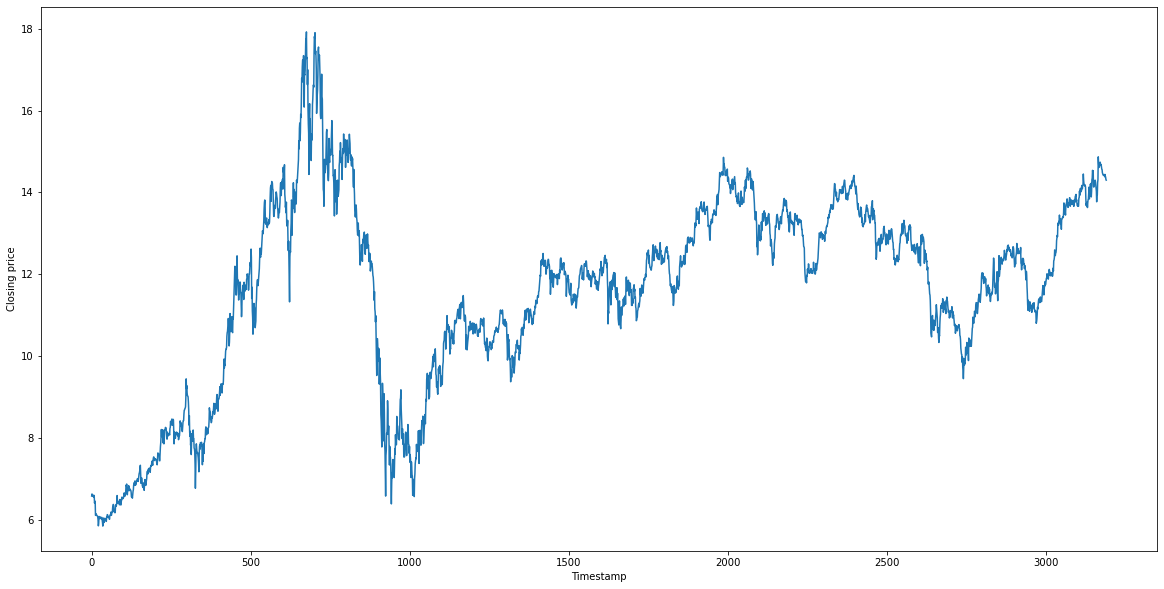

In [19]:
#Then we'd print the data after making changes and dropping null data
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
#print(data)
df = data

df.describe().transpose()

In [20]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2470
618


# Training part

In [21]:
Model = Sequential()
Model.add(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
Model.add(LSTM(40, return_sequences=True))
Model.add(Dropout(0.2))
Model.add(LSTM(10))
Model.add(Dense(1))
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 150)            150600    
                                                                 
 lstm_1 (LSTM)               (None, 1, 40)             30560     
                                                                 
 dropout (Dropout)           (None, 1, 40)             0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                2040      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 183,211
Trainable params: 183,211
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
62/62 [==============================] - 6s 23ms/step - loss: 0.0092 - val_loss: 0.0031
Epoch 2/40
62/62 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/40
62/62 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 4/40
62/62 [==============================] - 0s 6ms/step - loss: 9.2892e-04 - val_loss: 0.0012
Epoch 5/40
62/62 [==============================] - 0s 6ms/step - loss: 8.3947e-04 - val_loss: 0.0012
Epoch 6/40
62/62 [==============================] - 0s 6ms/step - loss: 7.4840e-04 - val_loss: 0.0011
Epoch 7/40
62/62 [==============================] - 0s 7ms/step - loss: 7.4160e-04 - val_loss: 0.0012
Epoch 8/40
62/62 [==============================] - 0s 6ms/step - loss: 6.0274e-04 - val_loss: 0.0012
Epoch 9/40
62/62 [==============================] - 0s 6ms/step - loss: 6.4445e-04 - val_loss: 0.0011
Epoch 10/40
62/62 [==============================] - 0s 6ms/step - loss: 6.3349e-04 - val_los

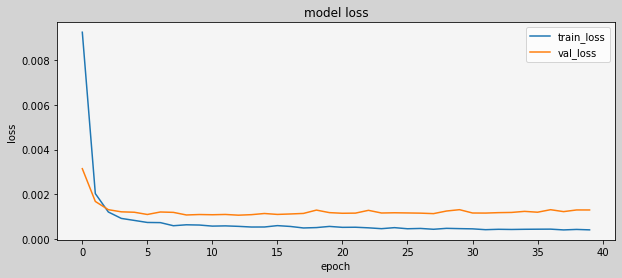

In [22]:
Model.compile(loss='mean_squared_error', optimizer='adam')
history = Model.fit(train_X, train_Y, epochs=40, batch_size=40, validation_data=(test_X, test_Y))
plt.figure(figsize=(10,4), facecolor='lightgrey')
ax = plt.axes()
ax.set_facecolor('whitesmoke')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()

In [23]:
Model.evaluate(test_X, test_Y)

20/20 [==============================] - 0s 2ms/step - loss: 0.0013


0.0013060371857136488

In [24]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = Model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.946020
R2 Score: 0.946020
Max Error: 0.648854


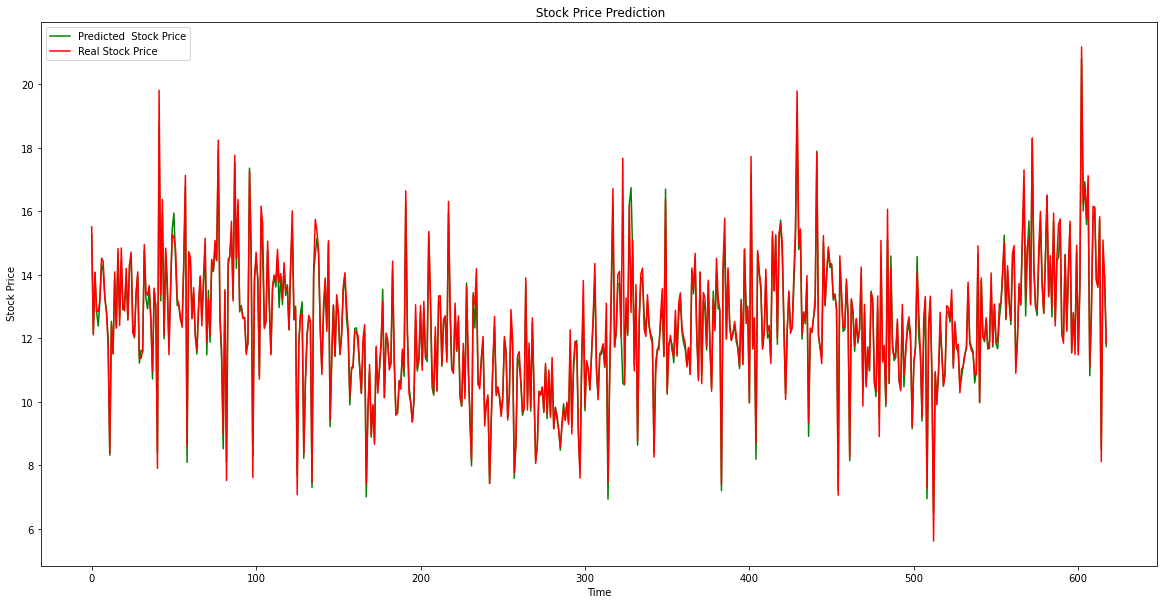

In [25]:
predicted  = Model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In [26]:
# First we need to save a model
Model.save("model.h5")

In [27]:
import tensorflow as tf
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 150)            150600    
                                                                 
 lstm_1 (LSTM)               (None, 1, 40)             30560     
                                                                 
 dropout (Dropout)           (None, 1, 40)             0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                2040      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 183,211
Trainable params: 183,211
Non-trainable params: 0
_________________________________________________________________


In [29]:
import requests
import csv
from tqdm import tqdm

def request_stock_price_list(symbol, size, token):
    q_string = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize={}&apikey={}'
    
    print("Retrieving stock price data from Alpha Vantage (This may take a while)...")
    r = requests.get(q_string.format(symbol, size, token))
    print("Data has been successfully downloaded...")
    date = []
    colnames = list(range(0, 5))
    df = pd.DataFrame(columns = colnames)
    print("Sorting the retrieved data into a dataframe...")
    for i in tqdm(r.json()['Time Series (Daily)'].keys()):
        date.append(i)
        row = pd.DataFrame.from_dict(r.json()['Time Series (Daily)'][i], orient='index').reset_index().T[1:]
        df = pd.concat([df, row], ignore_index=True)
    df.columns = ["open", "high", "low", "close", "volume"]
    df['date'] = date
    return df

In [30]:
# UNCOMMENT THE CELL IF DATA IS NEEDED TO BE LOADED FOR 1ST TIME

#cv1 = request_stock_price_list('IBM', 'full', 'key')
#cv1.to_csv('data_frame.csv')

In [31]:
data2 = pd.read_csv('data_frame.csv')

In [32]:
data2.dropna(inplace=True)
data2.head()

,Unnamed: 0,open,high,low,close,volume,date
0,0,136.46,137.2600,134.76,135.92,5942285,2022-05-05
1,1,132.87,137.8700,132.14,137.40,5913705,2022-05-04
2,2,133.00,133.6000,131.99,132.52,3688574,2022-05-03
3,3,133.00,133.7700,130.89,133.04,4213477,2022-05-02
4,4,135.13,135.5545,132.00,132.21,5078660,2022-04-29


In [33]:
data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('date', axis=1)

print(df2)

      Unnamed: 0    open      high     low   close    volume
0              0  136.46  137.2600  134.76  135.92   5942285
1              1  132.87  137.8700  132.14  137.40   5913705
2              2  133.00  133.6000  131.99  132.52   3688574
3              3  133.00  133.7700  130.89  133.04   4213477
4              4  135.13  135.5545  132.00  132.21   5078660
...          ...     ...       ...     ...     ...       ...
5660        5660   92.75   92.9400   90.19   90.25  13737600
5661        5661   94.44   94.4400   90.00   91.56  16697600
5662        5662   95.87   95.9400   93.50   94.37  10369100
5663        5663   96.75   96.8100   93.69   94.81  11105400
5664        5664   98.50   98.8100   96.37   96.75   9551800

[5665 rows x 6 columns]


In [34]:
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4450
1113


In [35]:
Model.evaluate(test_X, test_Y)

35/35 [==============================] - 0s 3ms/step - loss: 8.2217e-04


0.0008221680764108896

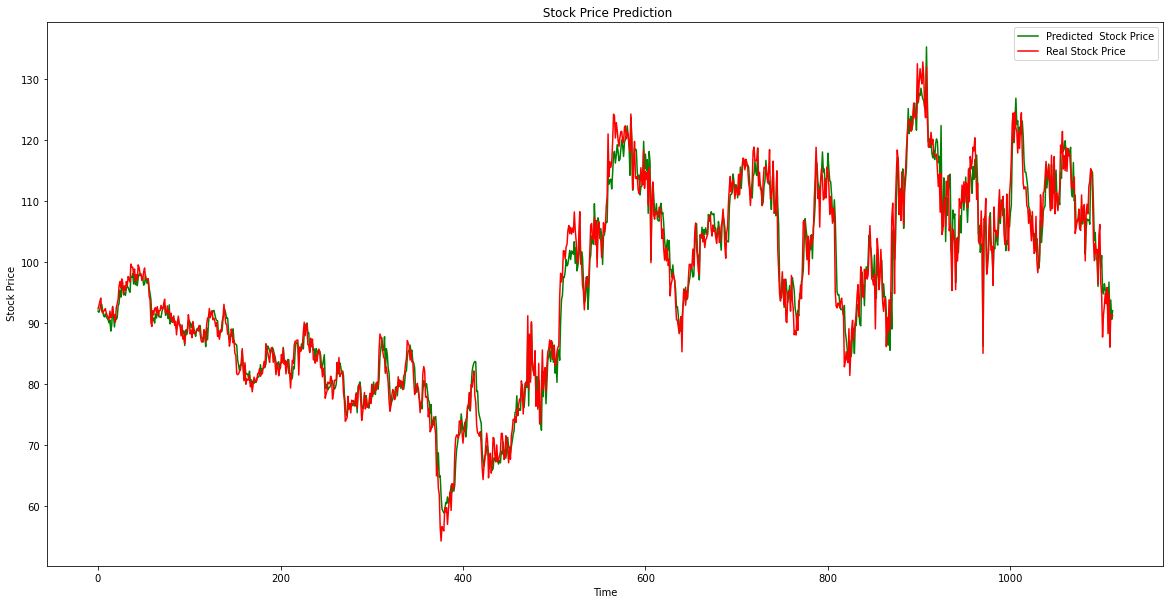

In [36]:
predicted  = Model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Exploratory Data Analysis (EDA)

In [37]:
dataX = pd.read_csv('data_frame.csv')
dataY = pd.read_csv('data_frame.csv')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5665 non-null   int64  
 1   open        5665 non-null   float64
 2   high        5665 non-null   float64
 3   low         5665 non-null   float64
 4   close       5665 non-null   float64
 5   volume      5665 non-null   int64  
 6   date        5665 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 309.9+ KB


In [38]:
dataX.head()

,Unnamed: 0,open,high,low,close,volume,date
0,0,136.46,137.2600,134.76,135.92,5942285,2022-05-05
1,1,132.87,137.8700,132.14,137.40,5913705,2022-05-04
2,2,133.00,133.6000,131.99,132.52,3688574,2022-05-03
3,3,133.00,133.7700,130.89,133.04,4213477,2022-05-02
4,4,135.13,135.5545,132.00,132.21,5078660,2022-04-29


In [39]:
start_date = '2020-01-01'
end_date = '2022-05-05'

start = '2018-01-01'
end = '2020-01-01'

fill = (dataX['date']>=start_date) & (dataX['date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Unnamed: 0,open,high,low,close,volume,date
0,0,136.46,137.2600,134.76,135.92,5942285,2022-05-05
1,1,132.87,137.8700,132.14,137.40,5913705,2022-05-04
2,2,133.00,133.6000,131.99,132.52,3688574,2022-05-03
3,3,133.00,133.7700,130.89,133.04,4213477,2022-05-02
4,4,135.13,135.5545,132.00,132.21,5078660,2022-04-29
...,...,...,...,...,...,...,...
586,586,134.51,135.8600,133.92,135.31,4345952,2020-01-08
587,587,133.69,134.9600,133.40,134.19,3267592,2020-01-07
588,588,133.42,134.2400,133.20,134.10,2421128,2020-01-06
589,589,133.57,134.8600,133.56,134.34,2373470,2020-01-03


In [40]:
fill2 = (dataY['date']>=start) & (dataY['date']<=end)
dataY = dataY.loc[fill2]
dataY

,Unnamed: 0,open,high,low,close,volume,date
591,591,132.53,134.12,132.40,134.04,3777504,2019-12-31
592,592,135.20,135.30,132.50,132.81,4118929,2019-12-30
593,593,135.00,135.75,134.87,135.27,2752185,2019-12-27
594,594,134.98,135.31,134.65,134.91,2129654,2019-12-26
595,595,135.61,135.62,134.61,134.98,1202087,2019-12-24
...,...,...,...,...,...,...,...
1089,1089,162.66,163.91,161.70,163.47,5101023,2018-01-08
1090,1090,162.44,162.90,161.10,162.49,5162075,2018-01-05
1091,1091,159.65,162.32,159.37,161.70,7363843,2018-01-04
1092,1092,157.34,159.81,156.33,158.49,9439063,2018-01-03


In [41]:
dataX.describe()

,Unnamed: 0,open,high,low,close,volume
count,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,295.000000,129.416798,130.739705,128.128197,129.432538,5.451659e+06
std,170.751281,10.540525,10.312628,10.707715,10.513957,3.216472e+06
min,0.000000,94.600000,97.740000,90.560000,94.770000,1.761122e+06
25%,147.500000,122.185000,123.382550,120.775000,122.080000,3.730344e+06
50%,295.000000,127.610000,128.650000,126.360000,127.400000,4.758488e+06
75%,442.500000,137.795000,139.077500,136.725000,137.950000,6.003114e+06
max,590.000000,156.820000,158.750000,155.420000,156.760000,3.806353e+07


In [42]:
dataY.describe()

,Unnamed: 0,open,high,low,close,volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,842.000000,140.470239,141.512740,139.348929,140.416143,4.590926e+06
std,145.347859,11.156349,11.144803,11.149435,11.121441,2.880224e+06
min,591.000000,108.000000,111.000000,105.940000,107.570000,1.202087e+06
25%,716.500000,134.485000,135.305000,133.570000,134.360000,3.067226e+06
50%,842.000000,140.720000,141.780000,139.790000,140.850000,3.783614e+06
75%,967.500000,146.635000,147.300000,145.540000,146.385000,5.033500e+06
max,1093.000000,170.000000,171.130000,168.150000,169.120000,2.206367e+07


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

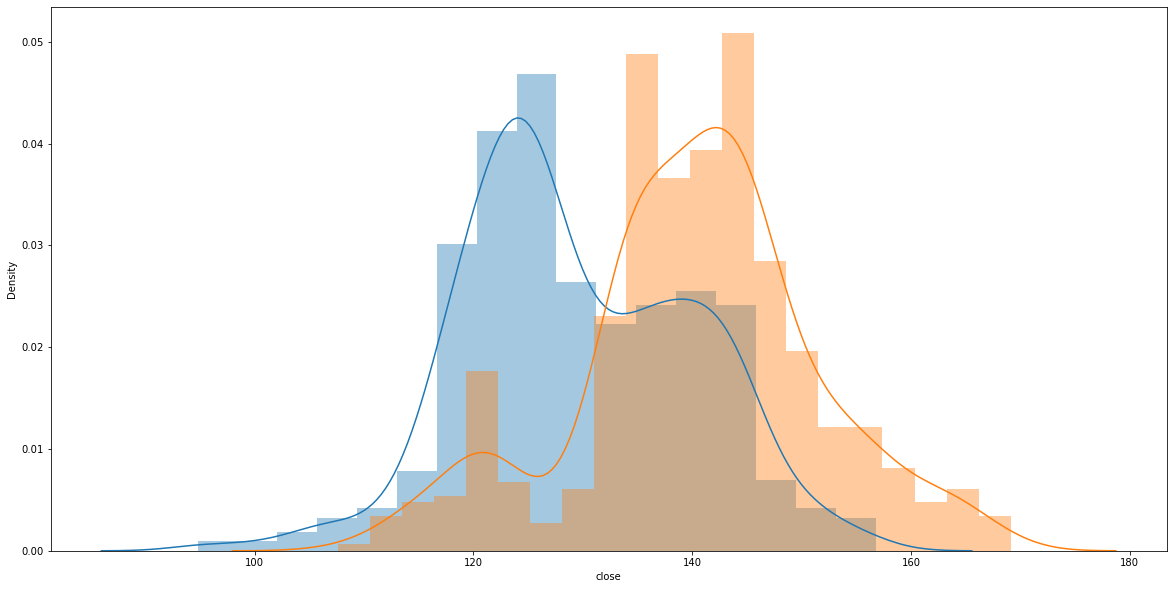

In [44]:
sns_plot = sns.distplot(dataX['close'])
sns_plot2 = sns.distplot(dataY['close'])

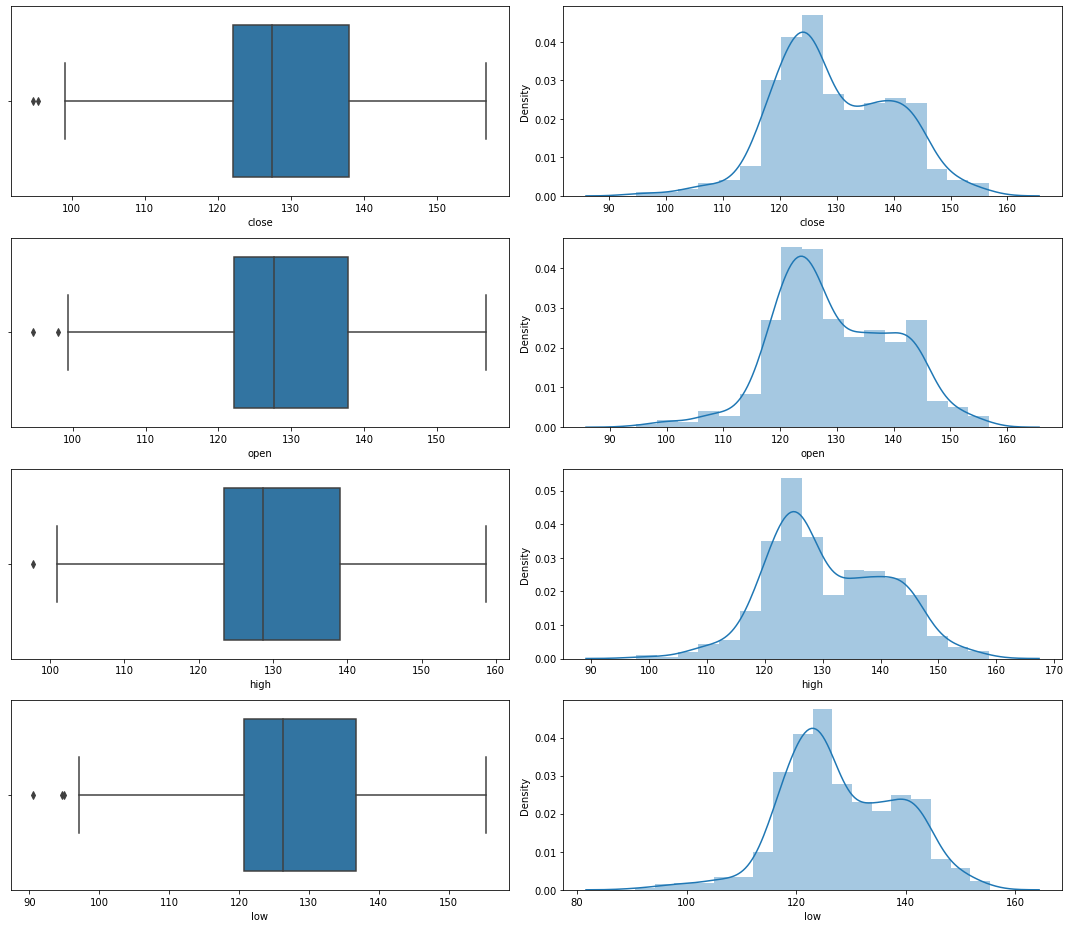

In [45]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["close"], ax = ax[0,0])
sns.distplot(dataX['close'], ax = ax[0,1])
sns.boxplot(x= dataX["open"], ax = ax[1,0])
sns.distplot(dataX['open'], ax = ax[1,1])
sns.boxplot(x= dataX["high"], ax = ax[2,0])
sns.distplot(dataX['high'], ax = ax[2,1])
sns.boxplot(x= dataX["low"], ax = ax[3,0])
sns.distplot(dataX['low'], ax = ax[3,1])
plt.tight_layout()

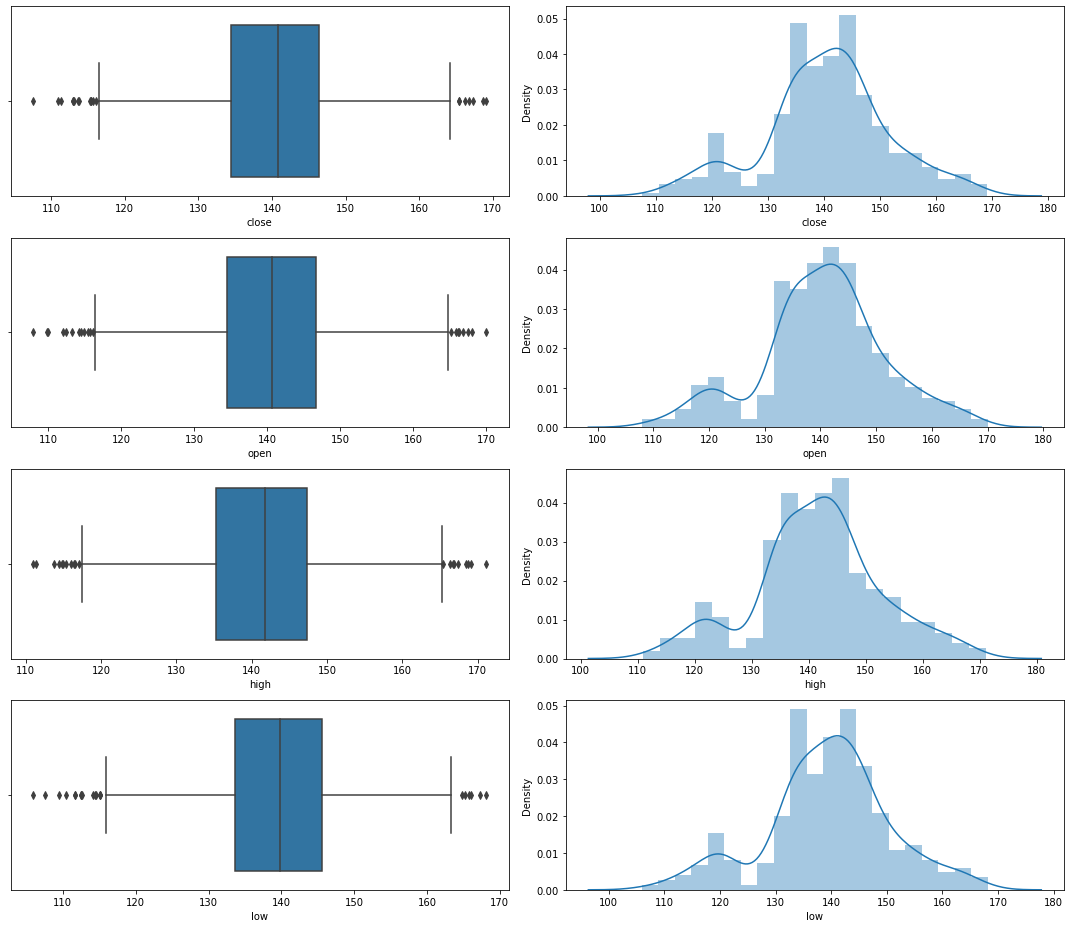

In [46]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataY["close"], ax = ax[0,0])
sns.distplot(dataY['close'], ax = ax[0,1])
sns.boxplot(x= dataY["open"], ax = ax[1,0])
sns.distplot(dataY['open'], ax = ax[1,1])
sns.boxplot(x= dataY["high"], ax = ax[2,0])
sns.distplot(dataY['high'], ax = ax[2,1])
sns.boxplot(x= dataY["low"], ax = ax[3,0])
sns.distplot(dataY['low'], ax = ax[3,1])
plt.tight_layout()

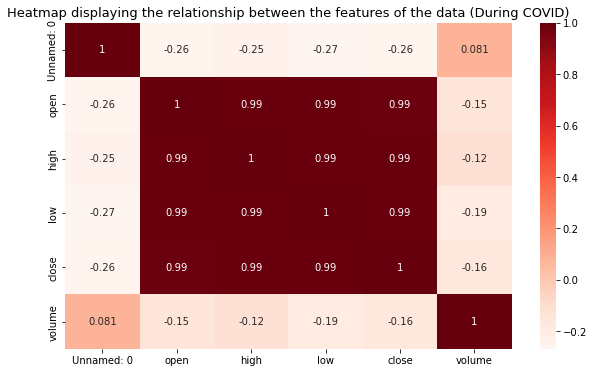

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(dataX.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (During COVID)',
         fontsize=13)
plt.show()

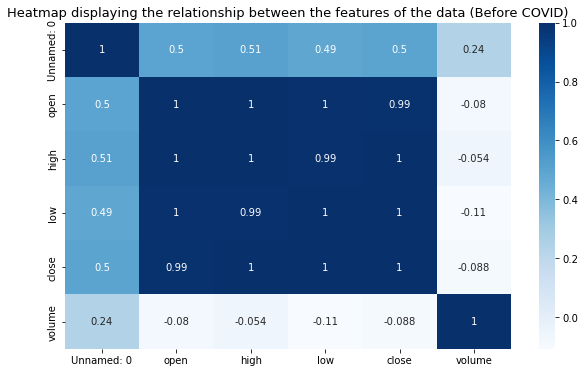

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(dataY.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (Before COVID)',
         fontsize=13)
plt.show()

In [49]:
# UNCOMMENT IF NEEDED...
#cv2 = request_stock_price_list('TITAN.BSE', 'full', 'key')
#print(cv2.head)
#cv2.to_csv('data_frame2.csv')

In [50]:
dataX = pd.read_csv('data_frame2.csv')
dataY = pd.read_csv('data_frame2.csv')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4271 non-null   int64  
 1   open        4271 non-null   float64
 2   high        4271 non-null   float64
 3   low         4271 non-null   float64
 4   close       4271 non-null   float64
 5   volume      4271 non-null   int64  
 6   date        4271 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 233.7+ KB


In [51]:
start_date = '2020-01-01'
end_date = '2022-05-05'

start = '2018-01-01'
end = '2020-01-01'

fill = (dataX['date']>=start_date) & (dataX['date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Unnamed: 0,open,high,low,close,volume,date
0,0,2303.55,2311.0000,2253.00,2261.8501,28528,2022-05-05
1,1,2351.00,2406.3000,2273.55,2288.3999,566492,2022-05-04
2,2,2425.00,2450.0000,2374.00,2386.6001,65400,2022-05-02
3,3,2515.00,2531.6499,2450.00,2459.2000,46932,2022-04-29
4,4,2525.00,2530.0000,2477.95,2514.3501,17742,2022-04-28
...,...,...,...,...,...,...,...
576,576,1169.00,1172.0000,1152.00,1159.9000,102829,2020-01-07
577,577,1159.65,1170.0000,1150.00,1158.3500,172246,2020-01-06
578,578,1155.05,1156.0000,1132.00,1139.5000,70128,2020-01-03
579,579,1154.50,1159.2500,1140.00,1155.4500,95694,2020-01-02


In [52]:
fill2 = (dataY['date']>=start) & (dataY['date']<=end)
dataY = dataY.loc[fill2]
dataY

,Unnamed: 0,open,high,low,close,volume,date
580,580,1196.40,1199.05,1152.30,1154.85,130373,2020-01-01
581,581,1195.05,1203.45,1184.80,1187.60,68224,2019-12-31
582,582,1194.00,1197.90,1183.65,1194.40,42872,2019-12-30
583,583,1193.00,1199.05,1185.25,1191.15,30063,2019-12-27
584,584,1205.10,1213.60,1190.35,1192.55,78967,2019-12-26
...,...,...,...,...,...,...,...
1065,1065,892.50,912.45,892.50,909.05,210096,2018-01-05
1066,1066,855.00,895.00,853.10,891.70,187384,2018-01-04
1067,1067,861.00,869.65,851.20,856.35,128194,2018-01-03
1068,1068,855.00,856.80,841.85,845.40,103573,2018-01-02


In [53]:
dataX.describe()

,Unnamed: 0,open,high,low,close,volume
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.00000
mean,290.000000,1631.635802,1652.564544,1606.925905,1629.172806,97343.30809
std,167.864529,557.412483,561.531905,550.561304,555.558832,87367.34206
min,0.000000,800.000000,843.750000,720.000000,798.050000,6281.00000
25%,145.000000,1171.550000,1191.000000,1158.000000,1174.450000,41994.00000
50%,290.000000,1505.350000,1517.650000,1476.900000,1495.850000,70083.00000
75%,435.000000,2155.000000,2175.000000,2136.000000,2154.500000,122161.00000
max,580.000000,2732.300000,2767.550000,2699.200000,2712.800000,607627.00000


In [54]:
dataY.describe()

,Unnamed: 0,open,high,low,close,volume
count,490.00000,490.000000,490.000000,490.000000,490.000000,4.900000e+02
mean,824.50000,1012.142041,1024.252347,997.861122,1010.888878,1.354089e+05
std,141.59508,153.735363,154.177506,152.527076,153.360353,1.267284e+05
min,580.00000,752.850000,786.500000,731.700000,750.350000,1.353000e+04
25%,702.25000,892.075000,902.062500,880.700000,890.512500,6.426650e+04
50%,824.50000,964.750000,974.175000,955.875000,963.725000,9.651250e+04
75%,946.75000,1125.812500,1138.512500,1112.525000,1125.387500,1.572478e+05
max,1069.00000,1380.000000,1389.850000,1351.000000,1374.300000,1.100881e+06


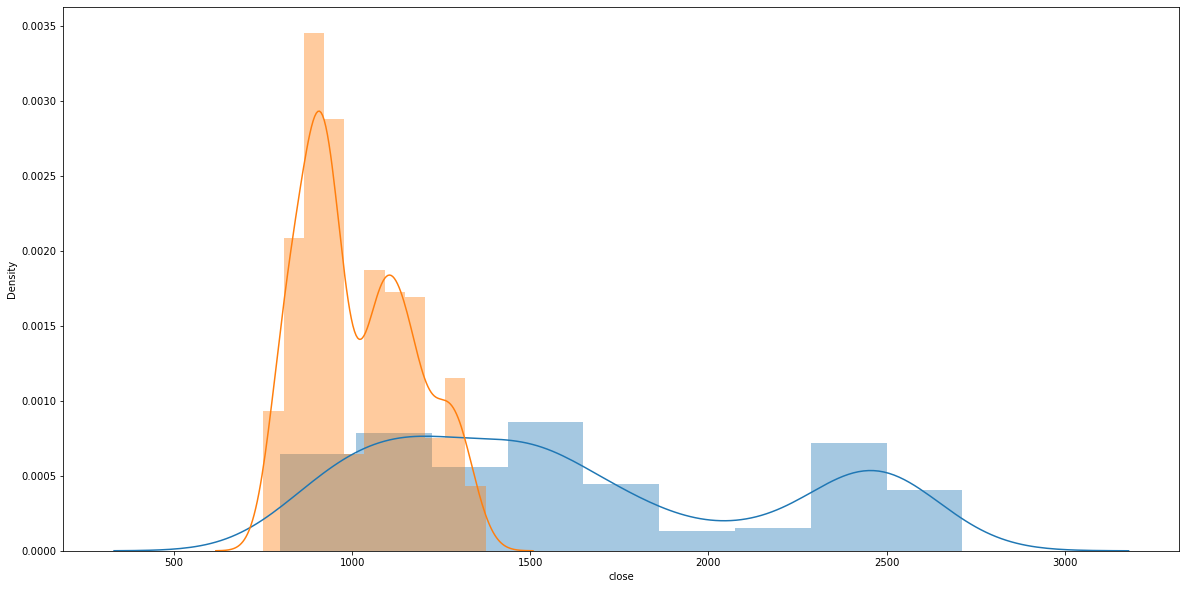

In [55]:
sns_plot = sns.distplot(dataX['close'])
sns_plot2 = sns.distplot(dataY['close'])

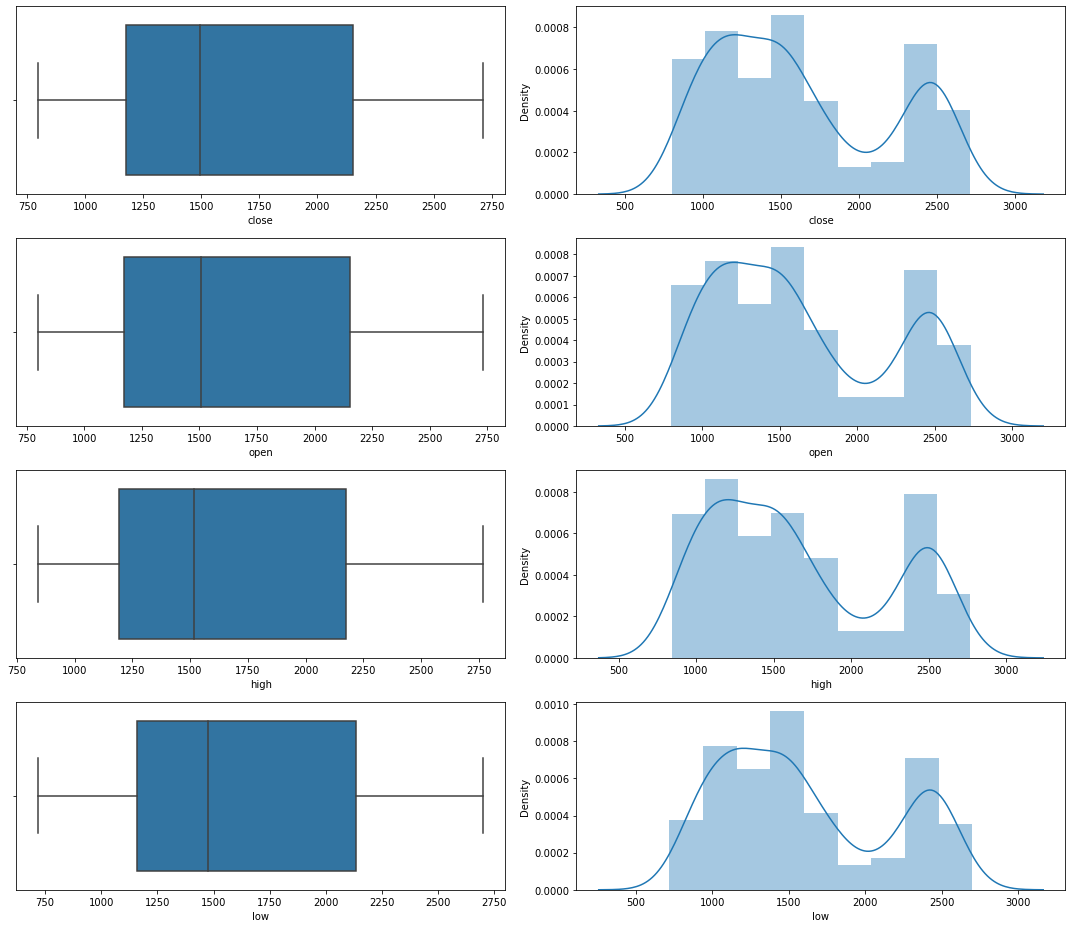

In [56]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["close"], ax = ax[0,0])
sns.distplot(dataX['close'], ax = ax[0,1])
sns.boxplot(x= dataX["open"], ax = ax[1,0])
sns.distplot(dataX['open'], ax = ax[1,1])
sns.boxplot(x= dataX["high"], ax = ax[2,0])
sns.distplot(dataX['high'], ax = ax[2,1])
sns.boxplot(x= dataX["low"], ax = ax[3,0])
sns.distplot(dataX['low'], ax = ax[3,1])
plt.tight_layout()

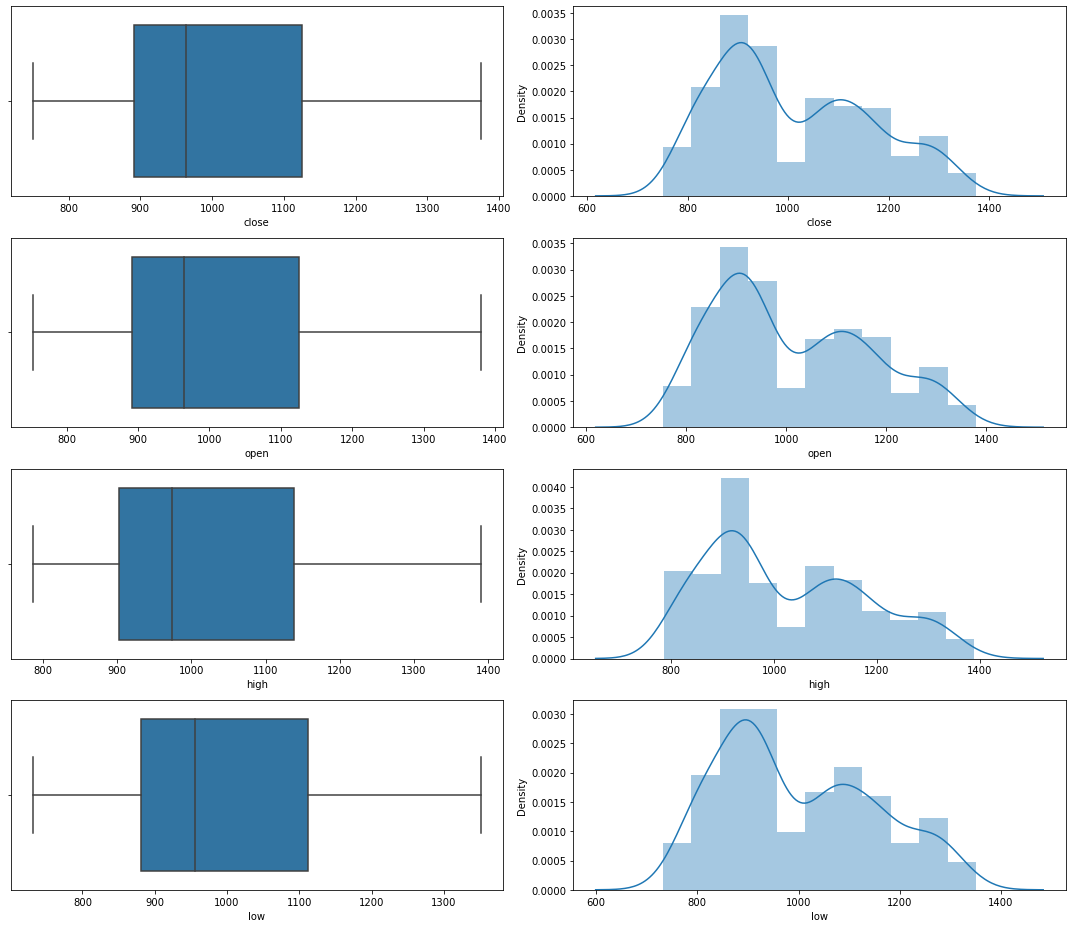

In [57]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataY["close"], ax = ax[0,0])
sns.distplot(dataY['close'], ax = ax[0,1])
sns.boxplot(x= dataY["open"], ax = ax[1,0])
sns.distplot(dataY['open'], ax = ax[1,1])
sns.boxplot(x= dataY["high"], ax = ax[2,0])
sns.distplot(dataY['high'], ax = ax[2,1])
sns.boxplot(x= dataY["low"], ax = ax[3,0])
sns.distplot(dataY['low'], ax = ax[3,1])
plt.tight_layout()

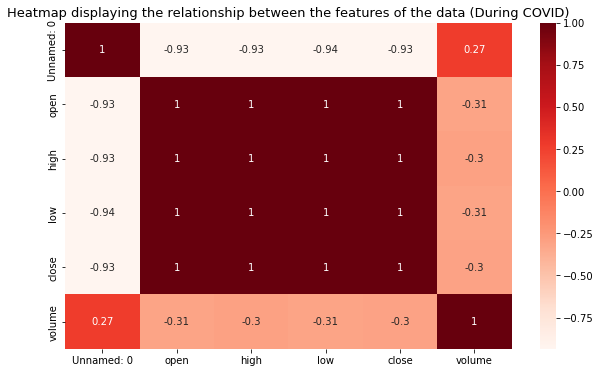

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(dataX.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (During COVID)',
         fontsize=13)
plt.show()

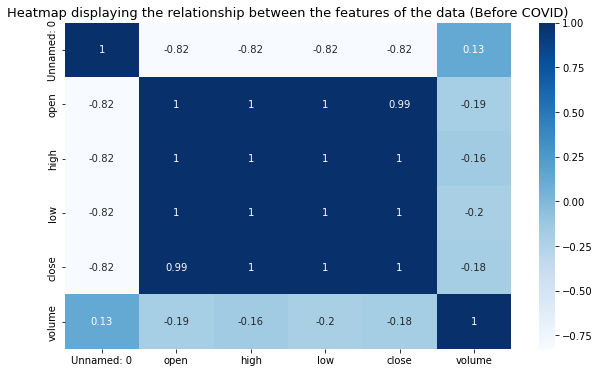

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(dataY.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data (Before COVID)',
         fontsize=13)
plt.show()